In [19]:
import time
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay

In [20]:
# Dosya yolu
file_path = "Student Depression Dataset.csv"

# CSV dosyasını okuma
df = pd.read_csv(file_path)

In [21]:
# Eksik verileri doldurma (ortalama ile)
df.fillna(df.mean(numeric_only=True), inplace=True)

# Gerekli sütunları seçme
features = ["Academic Pressure", "Work Pressure", "Study Satisfaction", "Sleep Duration", "Dietary Habits", "Financial Stress", "Family History of Mental Illness"]
target = "Depression"

# Kategorik verileri sayısal hale getirme
label_encoders = {}
for col in ["Sleep Duration", "Dietary Habits", "Family History of Mental Illness"]:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

In [22]:
# Bağımsız ve bağımlı değişkenleri ayırma
X = df[features]
y = df[target]

# Normalizasyon uygulama
scaler = MinMaxScaler()
X = pd.DataFrame(scaler.fit_transform(X), columns=features)

# Veriyi eğitim ve test kümelerine ayırma
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Eğitim süresi: 0.003836 saniye
Test süresi: 0.001216 saniye
Model Doğruluk Oranı: 0.77


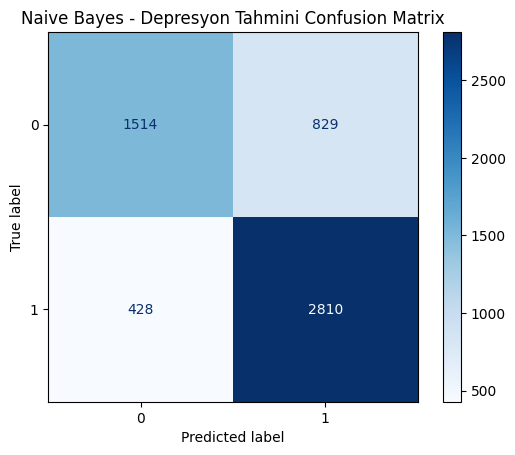

In [23]:
# Gaussian Naive Bayes modelini oluşturma
model = GaussianNB()

# Modeli eğitme ve eğitim süresini ölçme
start_fit = time.time()
model.fit(X_train, y_train)
fit_time = time.time() - start_fit
print(f"Eğitim süresi: {fit_time:.6f} saniye")

# Test verileri üzerinde tahmin yapma ve test süresini ölçme
start_pred = time.time()
y_pred = model.predict(X_test)
pred_time = time.time() - start_pred
print(f"Test süresi: {pred_time:.6f} saniye")

# Modelin doğruluk oranını hesaplama
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Doğruluk Oranı: {accuracy:.2f}")

# Confusion Matrix oluşturma
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.title("Naive Bayes - Depresyon Tahmini Confusion Matrix")
plt.show()
